In [1]:
import pandas as pd

In [4]:
sdf=pd.read_csv('C://Users/Ranjitha/Stocks.csv')
sdf.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volatility,percentChange
0,8/19/2004,100.01,104.06,95.96,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000,3.712563,0.323915
1,8/20/2004,101.01,109.08,100.50,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300,0.710922,6.739913
2,8/23/2004,110.76,113.48,109.05,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100,3.729433,-1.243144
3,8/24/2004,111.24,111.60,103.57,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300,6.417469,-6.074187
4,8/25/2004,104.76,108.00,103.88,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600,1.886792,1.169811


In [5]:
import matplotlib.pyplot as plt

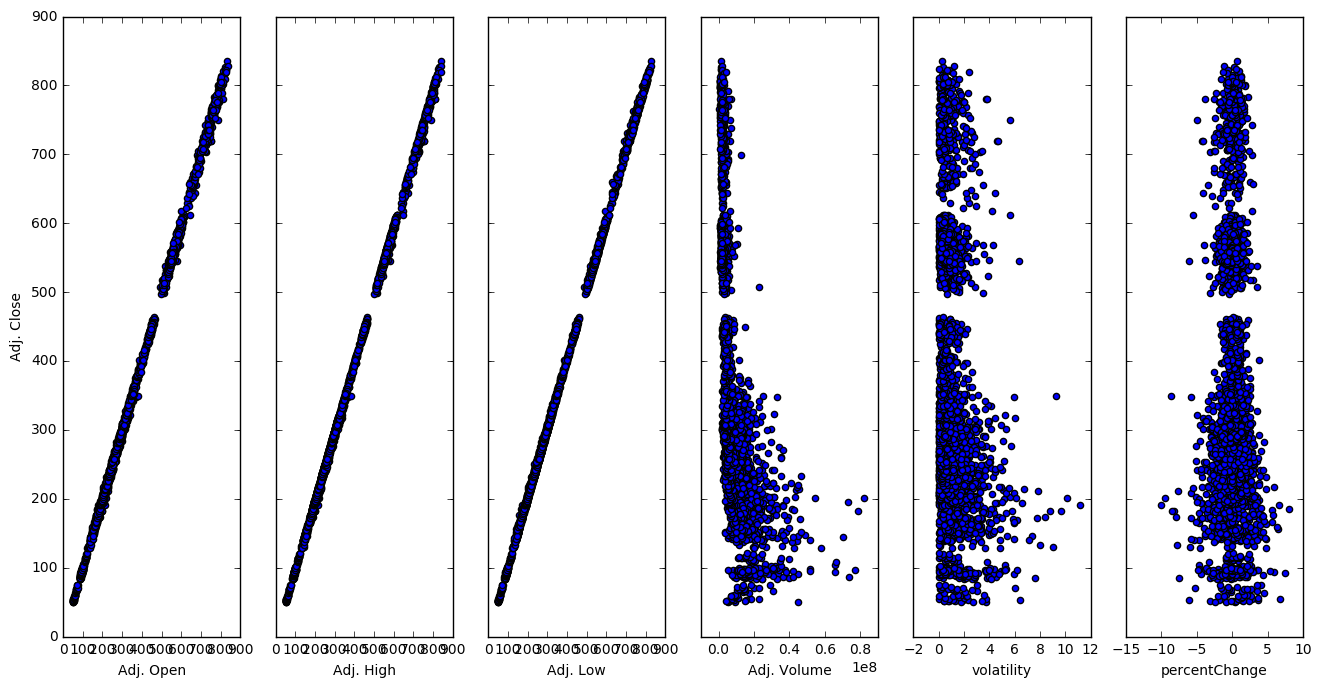

In [12]:
fig,axs = plt.subplots(1,6,sharey=True)
sdf.plot(kind='scatter',x='Adj. Open',y='Adj. Close',ax=axs[0],figsize=(16,8))
sdf.plot(kind='scatter', x='Adj. High',y='Adj. Close',ax=axs[1])
sdf.plot(kind='scatter', x='Adj. Low',y='Adj. Close',ax=axs[2])
sdf.plot(kind='scatter',x='Adj. Volume',y='Adj. Close',ax=axs[3])
sdf.plot(kind='scatter',x='volatility',y='Adj. Close',ax=axs[4])
sdf.plot(kind='scatter',x='percentChange',y='Adj. Close',ax=axs[5])
plt.show()

In [17]:
sdf.dtypes
sdf.Date=pd.to_datetime(sdf.Date)


In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.linear_model import LinearRegression

In [28]:
X=sdf[['Adj. Open','Adj. High','Adj. Low','Adj. Volume','volatility','percentChange']]
y=sdf['Adj. Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
lm=LinearRegression()
lm.fit(X_train,y_train)
Y_test=lm.predict(X_test)
actual_variance=lm.score(X_train,y_train)
print("actual{}".format(actual_variance))
explained_variance=lm.score(X_test,y_test)
print(format(explained_variance))

actual0.9999334671574235
0.999938557411421


In [35]:
print("Estimated coefficiency for linear regression{}".format(lm.coef_))
print("sum of resisulas {}".format(lm.residues_))

Estimated coefficiency for linear regression[ -2.78149617e-01   8.78582285e-01   3.95942742e-01   5.38084821e-08
  -1.91530923e+00  -4.52263618e-02]
sum of resisulas 5942.787918013921


C:\Users\Ranjitha\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

ev = explained_variance_score(y_test, Y_test, multioutput='uniform_average')
# Best possible score is 1.0, lower values are worse.
print("Explained Variance Score: {}". format(ev))

mae = mean_absolute_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Absolute Error: {}".format(mae))

mse = mean_squared_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Squared Error: {}".format(mse))

r2 = r2_score(y_test, Y_test)
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always 
# predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print("R - Squared value: {}".format(r2))

Explained Variance Score: 0.9999391191821184
Mean Absolute Error: 0.984825166269374
Mean Squared Error: 2.368882333937714
R - Squared value: 0.999938557411421


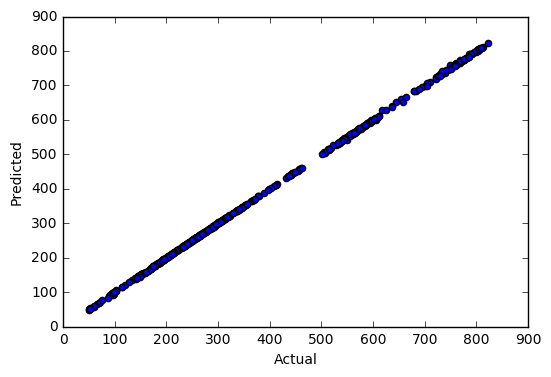

In [50]:
fig,ax=plt.subplots()
plt.scatter(y_test,Y_test)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()